In [45]:
import pandas as pd
import numpy as np

In [46]:
%pwd
%ls

CROISSANTS.csv                         VOLCANIC_ROCK.csv
CROISSANTS_trade.csv                   VOLCANIC_ROCK_VOUCHER_10000.csv
DJEMBES.csv                            VOLCANIC_ROCK_VOUCHER_10000_trade.csv
DJEMBES_trade.csv                      VOLCANIC_ROCK_VOUCHER_10250.csv
JAMS.csv                               VOLCANIC_ROCK_VOUCHER_10250_trade.csv
JAMS_trade.csv                         VOLCANIC_ROCK_VOUCHER_10500.csv
KELP.csv                               VOLCANIC_ROCK_VOUCHER_10500_trade.csv
KELP_trade.csv                         VOLCANIC_ROCK_VOUCHER_9500.csv
MAGNIFICENT_MACARONS.csv               VOLCANIC_ROCK_VOUCHER_9500_trade.csv
MAGNIFICENT_MACARONS_trade.csv         VOLCANIC_ROCK_VOUCHER_9750.csv
PICNIC_BASKET1.csv                     VOLCANIC_ROCK_VOUCHER_9750_trade.csv
PICNIC_BASKET1_trade.csv               VOLCANIC_ROCK_trade.csv
PICNIC_BASKET2.csv                     obs.csv
PICNIC_BASKET2_trade.csv               prices.csv
RAINFOREST_RESIN.csv                   trader_b

In [47]:
%cd ../../../data/round5/raw

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round5/raw


In [48]:
%ls

CROISSANTS.csv                         VOLCANIC_ROCK.csv
CROISSANTS_trade.csv                   VOLCANIC_ROCK_VOUCHER_10000.csv
DJEMBES.csv                            VOLCANIC_ROCK_VOUCHER_10000_trade.csv
DJEMBES_trade.csv                      VOLCANIC_ROCK_VOUCHER_10250.csv
JAMS.csv                               VOLCANIC_ROCK_VOUCHER_10250_trade.csv
JAMS_trade.csv                         VOLCANIC_ROCK_VOUCHER_10500.csv
KELP.csv                               VOLCANIC_ROCK_VOUCHER_10500_trade.csv
KELP_trade.csv                         VOLCANIC_ROCK_VOUCHER_9500.csv
MAGNIFICENT_MACARONS.csv               VOLCANIC_ROCK_VOUCHER_9500_trade.csv
MAGNIFICENT_MACARONS_trade.csv         VOLCANIC_ROCK_VOUCHER_9750.csv
PICNIC_BASKET1.csv                     VOLCANIC_ROCK_VOUCHER_9750_trade.csv
PICNIC_BASKET1_trade.csv               VOLCANIC_ROCK_trade.csv
PICNIC_BASKET2.csv                     obs.csv
PICNIC_BASKET2_trade.csv               prices.csv
RAINFOREST_RESIN.csv                   trader_b

In [49]:
df1 = pd.read_csv('prices.csv')
df2 = pd.read_csv('obs.csv')
df1 = df1[df1['product'] == 'MAGNIFICENT_MACARONS']

In [50]:
df = pd.merge(df1, df2, on = 'timestamp')

In [51]:
df['mid_price_diff'] = df['mid_price'].diff(5)
df.dropna(inplace = True)

In [52]:
#观察糖价、阳光指数和马卡龙价格的相关性
mid_prices = df['mid_price']
sugar_prices = df['sugarPrice']
sunlightIndex = df['sunlightIndex']
import statsmodels.api as sm
X = df[['sugarPrice','sunlightIndex']]
y = df['mid_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 3.807e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:17:49   Log-Likelihood:            -1.6142e+05
No. Observations:               29995   AIC:                         3.228e+05
Df Residuals:                   29992   BIC:                         3.229e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -688.7387     10.816    -63.679

In [53]:
# 格兰杰因果检验
from statsmodels.tsa.stattools import grangercausalitytests
gc_test = grangercausalitytests(df[['mid_price','sugarPrice']], maxlag=3)

# 协整检验（检查长期均衡关系）
from statsmodels.tsa.stattools import coint
coint_test = coint(df['mid_price'], df['sugarPrice'])



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0356  , p=0.8503  , df_denom=29991, df_num=1
ssr based chi2 test:   chi2=0.0356  , p=0.8503  , df=1
likelihood ratio test: chi2=0.0356  , p=0.8503  , df=1
parameter F test:         F=0.0356  , p=0.8503  , df_denom=29991, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=28.0510 , p=0.0000  , df_denom=29988, df_num=2
ssr based chi2 test:   chi2=56.1114 , p=0.0000  , df=2
likelihood ratio test: chi2=56.0590 , p=0.0000  , df=2
parameter F test:         F=28.0510 , p=0.0000  , df_denom=29988, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.1038 , p=0.0000  , df_denom=29985, df_num=3
ssr based chi2 test:   chi2=57.3247 , p=0.0000  , df=3
likelihood ratio test: chi2=57.2700 , p=0.0000  , df=3
parameter F test:         F=19.1038 , p=0.0000  , df_denom=29985, df_num=3


In [54]:
# 随机森林（特征重要性分析）
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)
print(rf.feature_importances_)

# 梯度提升树（捕捉非线性交互）
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)


[0.         0.70735226 0.29264774]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

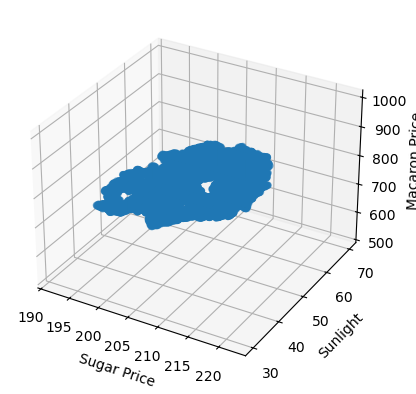

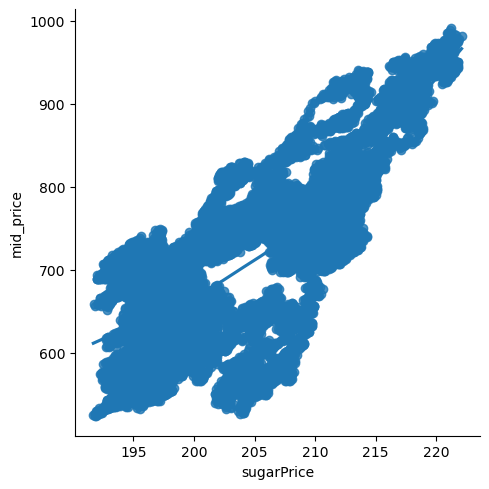

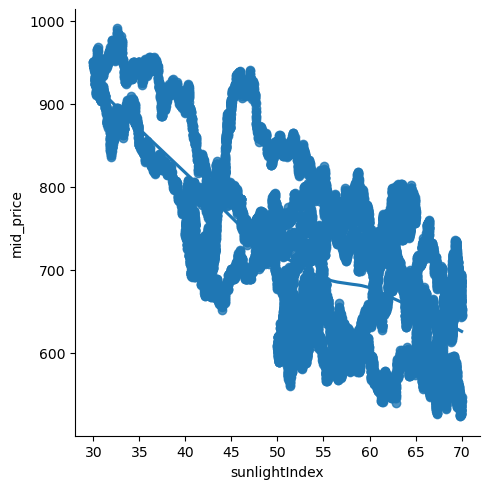

In [55]:
import matplotlib.pyplot as plt
# 三维散点图（交互效应观察）
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sugarPrice'], df['sunlightIndex'], df['mid_price'])
ax.set_xlabel('Sugar Price')
ax.set_ylabel('Sunlight')
ax.set_zlabel('Macaron Price')

# 局部加权回归（LOESS）
import seaborn as sns
sns.lmplot(x='sugarPrice', y='mid_price', data=df, lowess=True)

sns.lmplot(x='sunlightIndex', y='mid_price', data=df, lowess=True)


In [56]:
df['sugarPrice_lag2'] = df['sugarPrice'].shift(2)
model_lag = sm.OLS(df['mid_price'].iloc[2:], 
                   sm.add_constant(df[['sugarPrice_lag2','sunlightIndex']].iloc[2:])).fit()
print(model_lag.summary())

# 滚动格兰杰检验（检查结构性变化）
window_size = 5000
p_values = [grangercausalitytests(df[i:i+window_size][['mid_price','sugarPrice']], maxlag=2)[2][0]['ssr_ftest'][1] 
            for i in range(0, len(df)-window_size, 1000)]

                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 3.796e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:18:17   Log-Likelihood:            -1.6144e+05
No. Observations:               29993   AIC:                         3.229e+05
Df Residuals:                   29990   BIC:                         3.229e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -686.5519     10.825    -

In [62]:
import pandas as pd
import statsmodels.api as sm

# 创建滞后2期的糖价列
df['sugarPrice_lag2'] = df['sugarPrice'].shift(2)  
df['sunlightIndex_lag2'] = df['sunlightIndex'].shift(2)  

# 删除包含NaN的行（前两行因滞后产生缺失值）
df_lag = df.dropna(subset=['sugarPrice_lag2', 'sunlightIndex_lag2', 'mid_price'])  

# 提取变量
X = df_lag[['sugarPrice_lag2', 'sunlightIndex_lag2']]  # 自变量：滞后2期的糖价
y = df_lag['mid_price']          # 因变量：当期马卡龙价格
X = sm.add_constant(X)           # 添加截距项
# 拟合OLS模型
model_lag2 = sm.OLS(y, X).fit()
print(model_lag2.summary())

                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 3.794e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:21:02   Log-Likelihood:            -1.6144e+05
No. Observations:               29993   AIC:                         3.229e+05
Df Residuals:                   29990   BIC:                         3.229e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -686.5087     10

/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31958 (\N{CJK UNIFIED IDEOGRAPH-7CD6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/machinelearning/lib/python3.9/site-packages/IPython/core/pyl

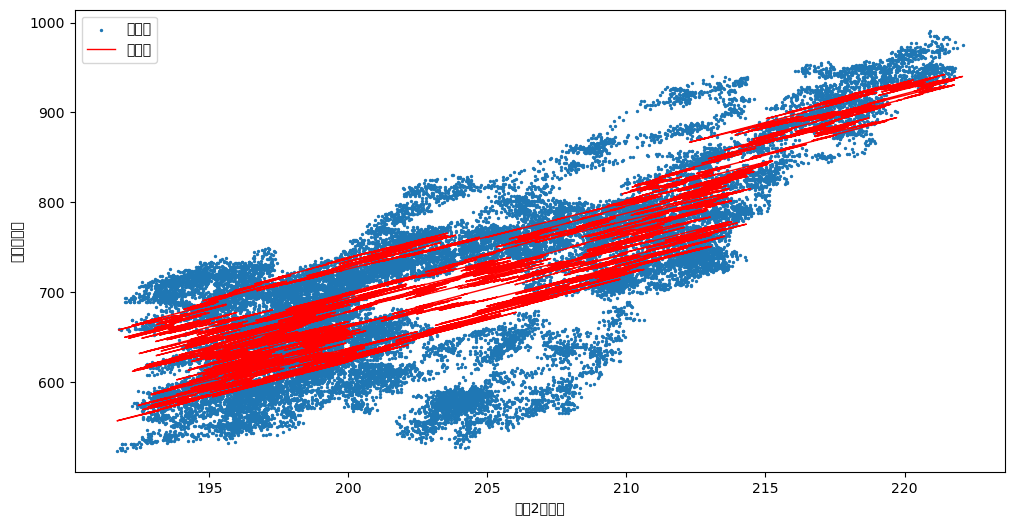

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_lag['sugarPrice_lag2'], y, s=2, label='实际值')
plt.plot(df_lag['sugarPrice_lag2'], model_lag2.predict(X), 
         color='red', linewidth=1, label='拟合线')
plt.xlabel('滞后2期糖价')
plt.ylabel('马卡龙价格')
plt.legend()
plt.show()
